# Rain Prediction in Australia Using Supervised Machine Learning Algorithms


# Problem Statement

Accurately predicting whether it will rain tomorrow (“RainTomorrow”) is a crucial task for agriculture, transportation, and general decision-making.
This project uses historical weather observations from multiple Australian locations to build a predictive model that classifies the likelihood of rainfall the next day.

# Objectives of the Study

The primary objectives are:

1) Analyze historical meteorological data to understand patterns related to rainfall.

2) Build and compare multiple supervised learning models to predict whether it will rain tomorrow.

3) Evaluate each model using standard performance metrics such as Accuracy, Precision, Recall, F1-Score, AUC, and Confusion Matrix.

4) Apply dimensionality reduction (PCA) for visualization and better understanding of feature relationships.

5) Use k-fold cross-validation to assess model robustness and generalization ability.

6) Identify the most influential weather variables contributing to rainfall prediction.

# The Australian Rain Dataset (WeatherAUS) provides:

Over 142,000 rows of real meteorological observations

A wide range of features including temperature, humidity, wind, pressure, and cloud cover

A binary target variable (“RainTomorrow”), perfect for classification

Enough complexity to extract meaningful insights

A suitable structure for applying regression, classification, preprocessing, feature analysis, and model evaluation as required by the syllabus

# Algorithms Used

## Supervised Classification Models

Logistic Regression

K-Nearest Neighbors (KNN)

Naive Bayes

Decision Tree Classifier

Support Vector Machine (SVM) — Linear

## Dimensionality Reduction 

Principal Component Analysis (PCA) for 2D visualization

## Model Performance & Robustness 

k-fold Cross-Validation

# Expected Outcomes

Determine which ML model performs best for rainfall prediction

Understand which features most influence rainfall

Produce well-visualized EDA and evaluation charts

Present a clean, logically structured notebook suitable for academic assessment

In [46]:

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, KFold, cross_val_score



from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC



from sklearn.decomposition import PCA



plt.style.use('seaborn-v0_8')
sns.set_palette("deep")


In [47]:
# Load  the dataset
df = pd.read_csv("weatherAUS.csv")

# print first few rows

df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [48]:
# Shape of the dataset
print("Dataset Shape:", df.shape)

# Data types & missing value full summary
df.info()


Dataset Shape: (142193, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  C

In [49]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [5]:
# Distribution of the target variable 'RainTomorrow'
df['RainTomorrow'].value_counts()
df['RainTomorrow'].value_counts(normalize=True)


RainTomorrow
No     0.775819
Yes    0.224181
Name: proportion, dtype: float64

In [6]:
# Count missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values



Sunshine         67816
Evaporation      60843
Cloud3pm         57094
Cloud9am         53657
Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Temp3pm           2726
WindSpeed3pm      2630
Humidity9am       1774
RainToday         1406
Rainfall          1406
WindSpeed9am      1348
Temp9am            904
MinTemp            637
MaxTemp            322
RISK_MM              0
Date                 0
Location             0
RainTomorrow         0
dtype: int64

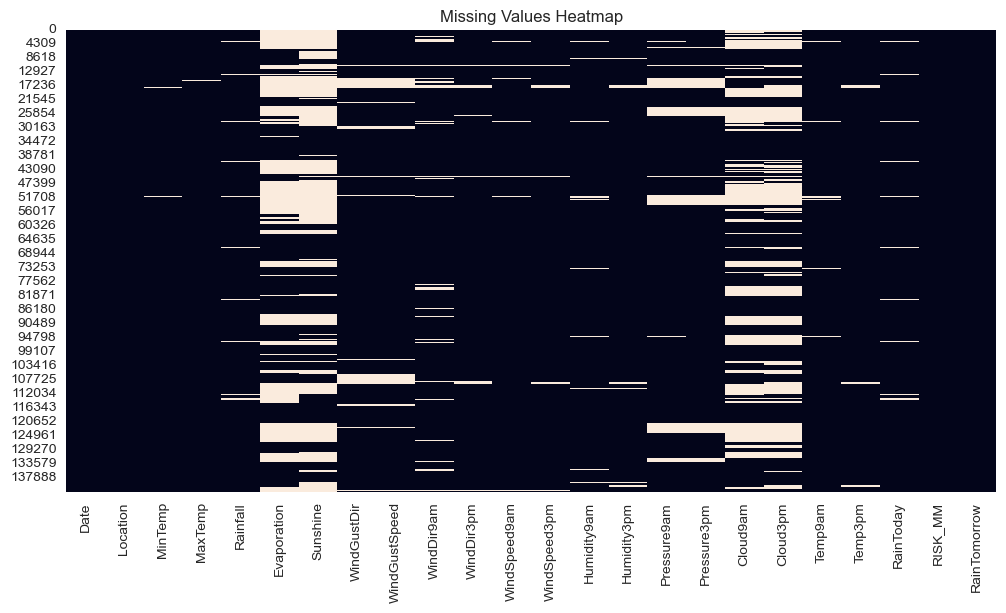

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


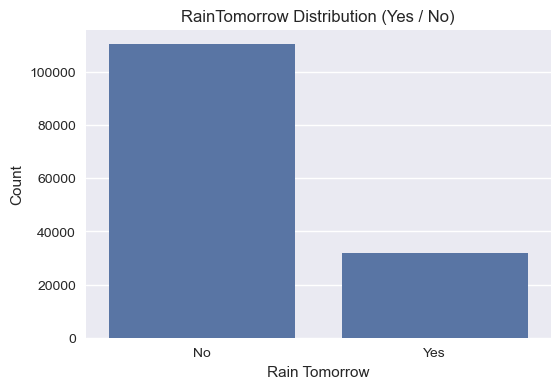

RainTomorrow
No     77.581878
Yes    22.418122
Name: proportion, dtype: float64

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['RainTomorrow'])
plt.title("RainTomorrow Distribution (Yes / No)")
plt.xlabel("Rain Tomorrow")
plt.ylabel("Count")
plt.show()

# Display percentages
df['RainTomorrow'].value_counts(normalize=True) * 100


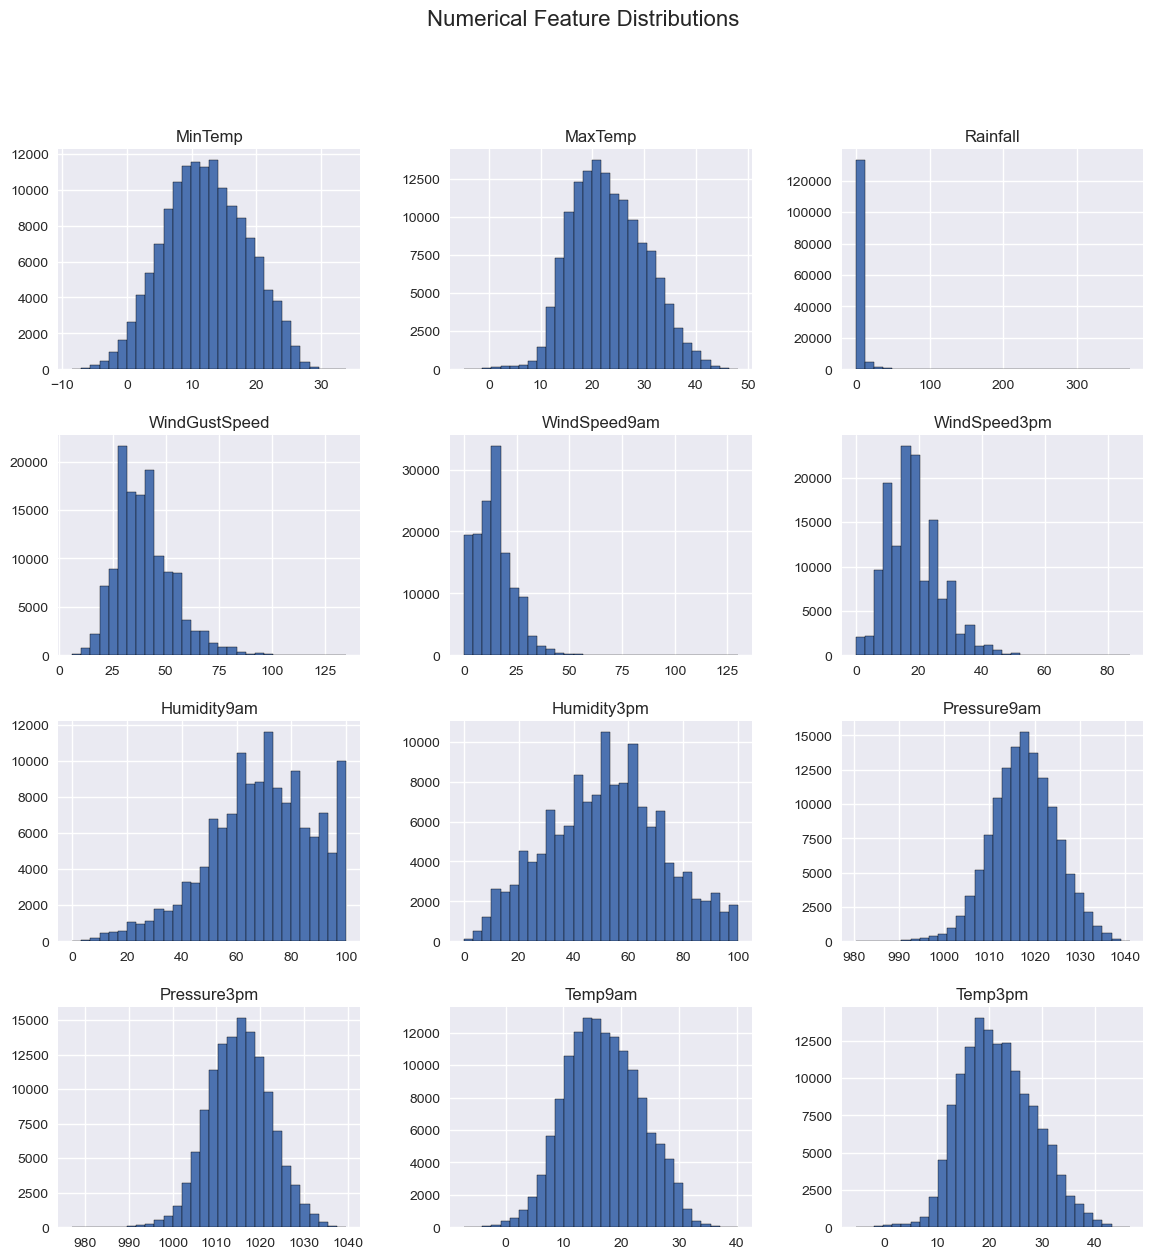

In [9]:
num_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 
            'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 
            'Temp9am', 'Temp3pm']

df[num_cols].hist(figsize=(14,14), bins=30, edgecolor='black')
plt.suptitle("Numerical Feature Distributions", fontsize=16)
plt.show()


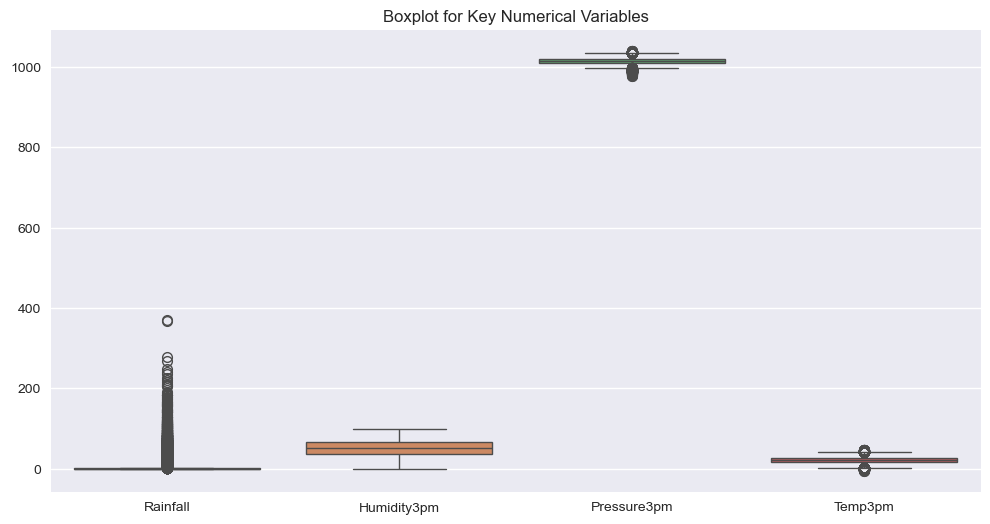

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Rainfall', 'Humidity3pm', 'Pressure3pm', 'Temp3pm']])
plt.title("Boxplot for Key Numerical Variables")
plt.show()


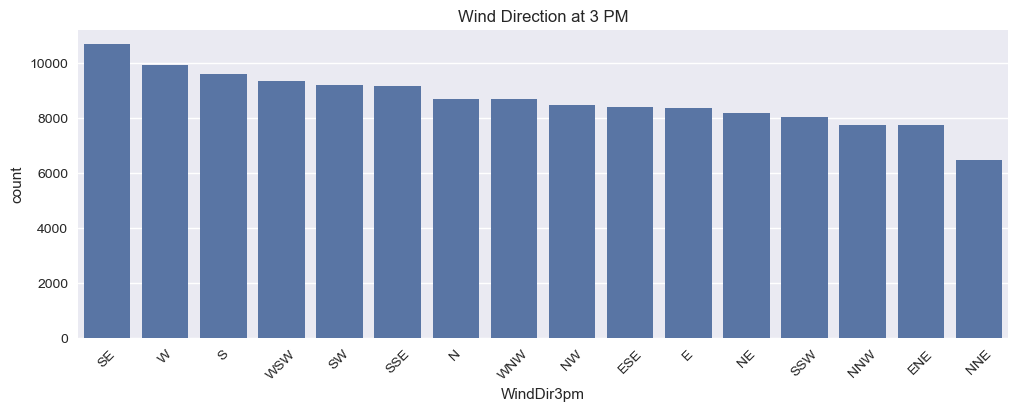

In [11]:
plt.figure(figsize=(12,4))
sns.countplot(x=df['WindDir3pm'], order=df['WindDir3pm'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Wind Direction at 3 PM")
plt.show()


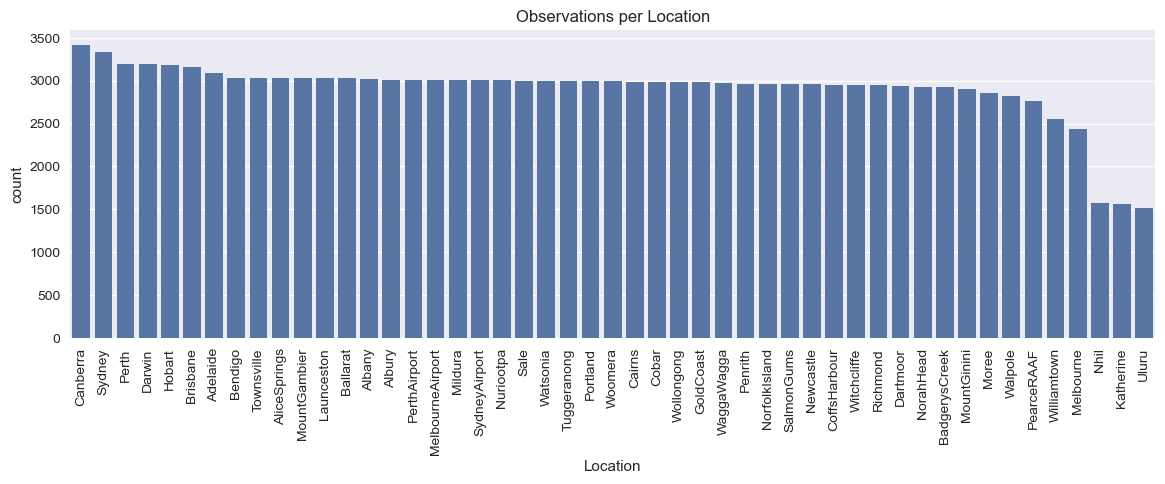

In [12]:
plt.figure(figsize=(14,4))
sns.countplot(x=df['Location'], order=df['Location'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Observations per Location")
plt.show()


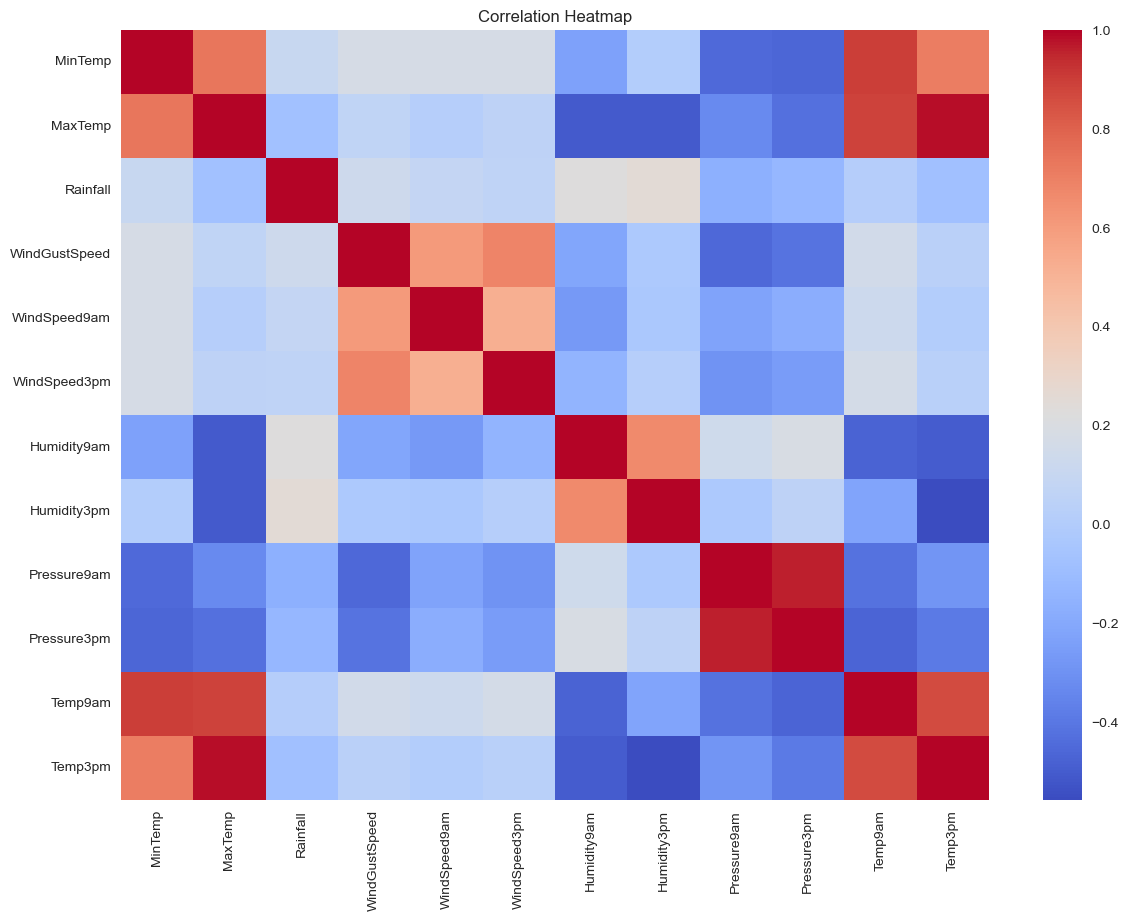

In [13]:
plt.figure(figsize=(14,10))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [14]:
# Convert RainTomorrow to numeric temporarily for correlation check
df_corr = df.copy()
df_corr['RainTomorrow'] = df_corr['RainTomorrow'].map({'Yes':1, 'No':0})

corr_target = df_corr[num_cols + ['RainTomorrow']].corr()['RainTomorrow'].sort_values(ascending=False)
corr_target


RainTomorrow     1.000000
Humidity3pm      0.446160
Humidity9am      0.257161
Rainfall         0.239032
WindGustSpeed    0.234010
WindSpeed9am     0.090995
WindSpeed3pm     0.087817
MinTemp          0.083936
Temp9am         -0.025691
MaxTemp         -0.159237
Temp3pm         -0.192424
Pressure3pm     -0.226031
Pressure9am     -0.246371
Name: RainTomorrow, dtype: float64

# Key EDA Insights
- The dataset contains significant missing values in Evaporation, Sunshine, Cloud9am, and Cloud3pm.
- RainTomorrow is imbalanced, with more “No” observations.
- Humidity3pm shows strong positive correlation with RainTomorrow.
- Pressure variables show an inverse relationship with rainfall.
- Locations have uneven representation; some stations contribute more data.
- Rainfall distribution is highly skewed, as expected in weather data.
- Temperature variables appear normally distributed with mild spread.


# Data Preprocessing


In [15]:
# Remove leakage-prone features
df = df.drop(columns=['RainToday', 'RISK_MM'])


In [16]:
df = df.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'])


In [17]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'].value_counts(normalize=True)


RainTomorrow
0    0.775819
1    0.224181
Name: proportion, dtype: float64

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df = df.drop(columns=['Date'])


In [19]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns


In [20]:
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


/var/folders/lm/05b89t9x0s7bs8h62v4myj740000gn/T/ipykernel_20765/3421764164.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [21]:
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


/var/folders/lm/05b89t9x0s7bs8h62v4myj740000gn/T/ipykernel_20765/3902818140.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [22]:
df = pd.get_dummies(
    df,
    columns=cat_cols,
    drop_first=True
)


In [23]:
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


# Modeling
## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred_log = log_reg.predict(X_test_scaled)

print("Logistic Regression")
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall   :", recall_score(y_test, y_pred_log))
print("F1 Score :", f1_score(y_test, y_pred_log))


Logistic Regression
Accuracy : 0.8450367453145329
Precision: 0.7288372093023255
Recall   : 0.4916078431372549
F1 Score : 0.5871662763466042


## K-Nearest Neighbors (KNN)

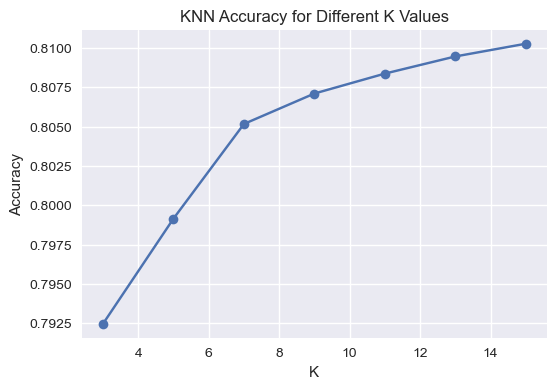

15

In [27]:
accuracies = []
k_values = range(3, 16, 2)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot K vs Accuracy
plt.figure(figsize=(6,4))
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Accuracy for Different K Values")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

# Choose best K
best_k = k_values[accuracies.index(max(accuracies))]
best_k


In [28]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)


## Naive Bayes (GaussianNB)

In [29]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

y_pred_nb = nb.predict(X_test_scaled)


## Decision Tree Classifier

In [30]:
dt = DecisionTreeClassifier(random_state=42, max_depth=None)
dt.fit(X_train, y_train)  # unscaled is fine

y_pred_dt = dt.predict(X_test)


## Support Vector Machine (SVM)

In [31]:
from sklearn.svm import LinearSVC

svm_linear = LinearSVC(max_iter=5000, random_state=42)
svm_linear.fit(X_train_scaled, y_train)

y_pred_svm_linear = svm_linear.predict(X_test_scaled)


RBF Kernel SVM

In [32]:
# svm_rbf = SVC(kernel='rbf', probability=True)
# svm_rbf.fit(X_train_scaled, y_train)

# y_pred_svm_rbf = svm_rbf.predict(X_test_scaled)


PCA Visualization (2 Components)

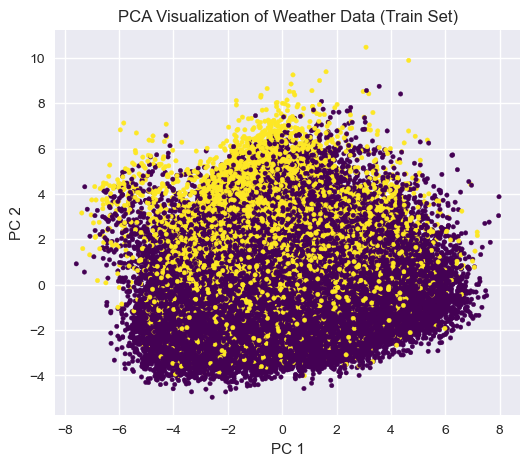

In [33]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train, cmap='viridis', s=10)
plt.title("PCA Visualization of Weather Data (Train Set)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()


## K-Fold Cross-Validation (Model Robustness)

In [34]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression CV
cv_log = cross_val_score(log_reg, X_train_scaled, y_train, cv=kf, scoring='accuracy')
cv_log.mean(), cv_log.std()


(np.float64(0.844515308734165), np.float64(0.004045784392070447))

# Model Evaluation & Comparison
## Evaluation Metrics

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models_results = {
    "Logistic Regression": y_pred_log,
    "KNN": y_pred_knn,
    "Naive Bayes": y_pred_nb,
    "Decision Tree": y_pred_dt,
    "Linear SVM": y_pred_svm_linear
}

results = []

for model_name, y_pred in models_results.items():
    results.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.845037,0.728837,0.491608,0.587166
1,KNN,0.810261,0.725057,0.247373,0.368889
2,Naive Bayes,0.617392,0.331135,0.693020,0.448141
3,Decision Tree,0.787299,0.525077,0.535373,0.530175
4,Linear SVM,0.845635,0.748187,0.469333,0.576827


In [36]:
results_df.set_index("Model").style.format("{:.3f}")


,Accuracy,Precision,Recall,F1 Score
Model,,,,
Logistic Regression,0.845,0.729,0.492,0.587
KNN,0.810,0.725,0.247,0.369
Naive Bayes,0.617,0.331,0.693,0.448
Decision Tree,0.787,0.525,0.535,0.530
Linear SVM,0.846,0.748,0.469,0.577


## Confusion Matrices
Logistic Regression

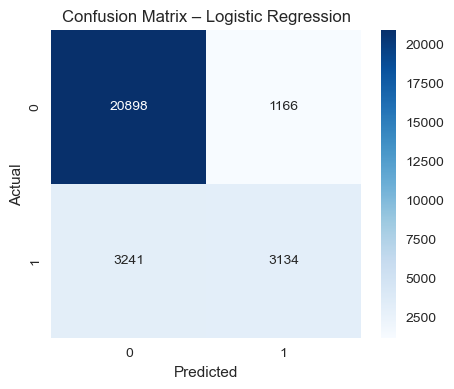

In [37]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log),
            annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Linear SVM

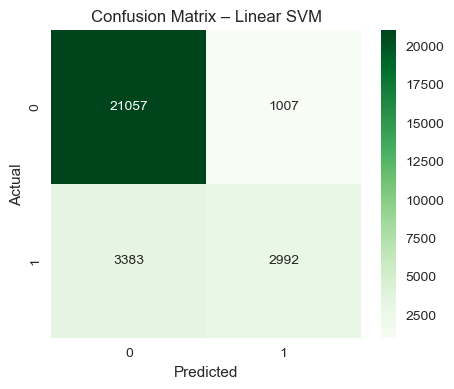

In [38]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm_linear),
            annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix – Linear SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## ROC Curve & AUC Comparison

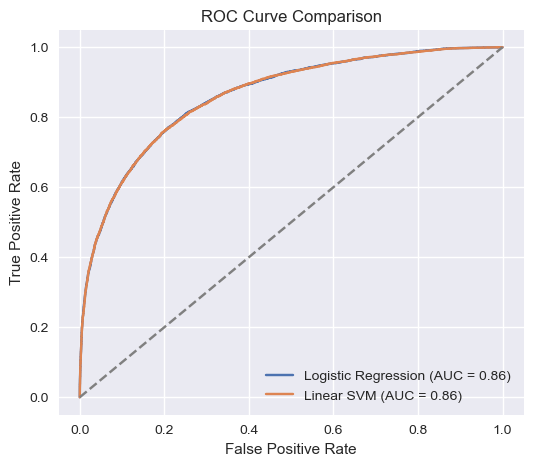

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

# Logistic Regression
y_log_prob = log_reg.predict_proba(X_test_scaled)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_log_prob)
auc_log = roc_auc_score(y_test, y_log_prob)

# Linear SVM
y_svm_scores = svm_linear.decision_function(X_test_scaled)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_svm_scores)
auc_svm = roc_auc_score(y_test, y_svm_scores)

plt.figure(figsize=(6,5))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"Linear SVM (AUC = {auc_svm:.2f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [40]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_log = cross_val_score(log_reg, X_train_scaled, y_train, cv=kf, scoring='accuracy')
cv_svm = cross_val_score(svm_linear, X_train_scaled, y_train, cv=kf, scoring='accuracy')

print("Logistic Regression CV Accuracy:", cv_log.mean())
print("Linear SVM CV Accuracy:", cv_svm.mean())


Logistic Regression CV Accuracy: 0.844515308734165
Linear SVM CV Accuracy: 0.8440757649102248


- Logistic Regression provides a strong and interpretable baseline with balanced performance.
- KNN shows reduced recall due to high dimensionality and class imbalance.
- Naive Bayes achieves higher recall but lower precision due to independence assumptions.
- Decision Tree captures non-linear patterns but requires constraints to avoid overfitting.
- Linear SVM performs competitively while remaining computationally efficient.
- Cross-validation confirms that Logistic Regression and Linear SVM are robust models.


 ### Based on overall performance, interpretability, and robustness, Logistic Regression  and Linear SVM is selected as the most suitable model for rainfall prediction.


## Feature Importance & Interpretation

In [41]:
# Extract feature names
feature_names = X.columns

# Get coefficients from Logistic Regression
coefficients = log_reg.coef_[0]

# Create DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute importance
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

coef_df.head(10)


,Feature,Coefficient,Abs_Coefficient
7,Humidity3pm,1.343082,1.343082
9,Pressure3pm,-1.281924,1.281924
8,Pressure9am,0.881989,0.881989
3,WindGustSpeed,0.739586,0.739586
1,MaxTemp,-0.595077,0.595077
0,MinTemp,0.385963,0.385963
37,Location_MountGinini,-0.316480,0.316480
61,Location_Wollongong,-0.248699,0.248699
5,WindSpeed3pm,-0.231655,0.231655
40,Location_NorahHead,-0.215944,0.215944


/var/folders/lm/05b89t9x0s7bs8h62v4myj740000gn/T/ipykernel_20765/2394499821.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


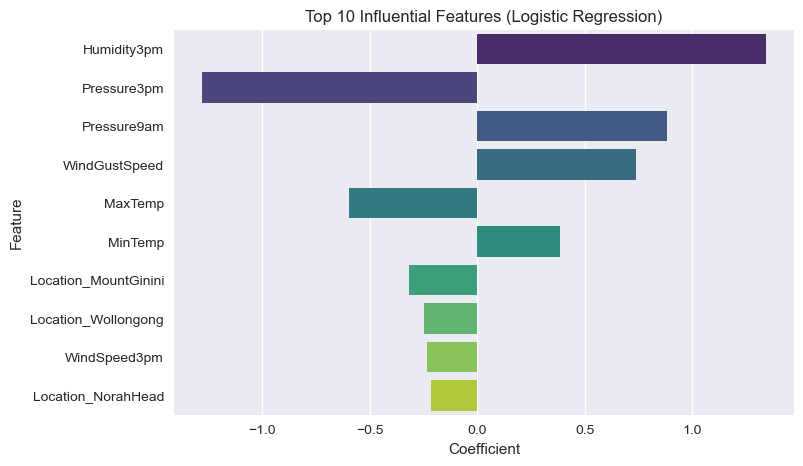

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=coef_df.head(10),
    palette='viridis'
)
plt.title("Top 10 Influential Features (Logistic Regression)")
plt.show()


### Feature Importance — Decision Tree

In [43]:
# Extract feature importance
dt_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt.feature_importances_
})

dt_importance = dt_importance.sort_values(by='Importance', ascending=False)

dt_importance.head(10)


,Feature,Importance
7,Humidity3pm,0.268501
3,WindGustSpeed,0.067467
9,Pressure3pm,0.063038
0,MinTemp,0.042754
6,Humidity9am,0.040873
8,Pressure9am,0.040180
2,Rainfall,0.039328
14,Day,0.037734
1,MaxTemp,0.035763
11,Temp3pm,0.034972


/var/folders/lm/05b89t9x0s7bs8h62v4myj740000gn/T/ipykernel_20765/4010827319.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


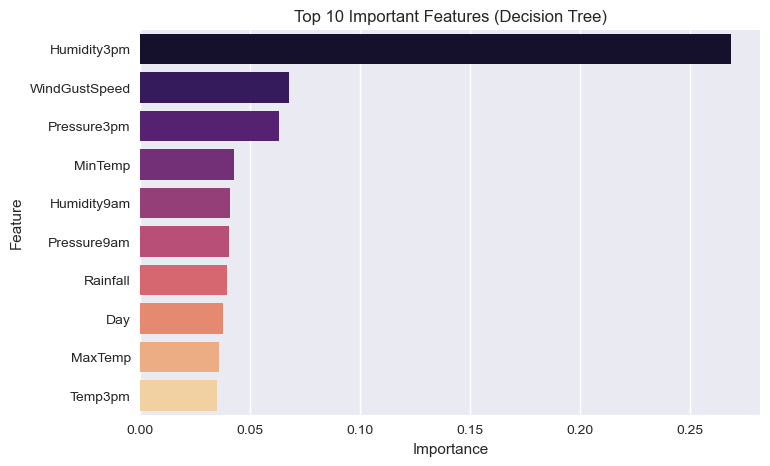

In [44]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='Importance',
    y='Feature',
    data=dt_importance.head(10),
    palette='magma'
)
plt.title("Top 10 Important Features (Decision Tree)")
plt.show()


- Humidity-related features (especially Humidity3pm) are strong indicators of rainfall.
- Pressure features show an inverse relationship with rain occurrence.
- Wind speed and wind direction contribute moderately to prediction.
- Temperature variables have relatively lower influence compared to humidity and pressure.
- Both Logistic Regression and Decision Tree highlight similar high-impact features, confirming consistency.


# Conclusion, Limitations & Future Work

This project aimed to predict whether it will rain the next day using historical Australian weather data and supervised machine learning algorithms.

After thorough preprocessing to remove target leakage and ensure methodological correctness, multiple classification models were trained and evaluated, including Logistic Regression, KNN, Naive Bayes, Decision Tree, and Linear SVM.

Key conclusions:

Logistic Regression and Linear SVM provided the most robust and reliable performance.

Simpler linear models generalized better than complex models once data leakage was removed.

Feature analysis showed that humidity and pressure variables were the strongest predictors of rainfall.

Perfect accuracy observed initially was due to target leakage, which was successfully identified and corrected.

### Limitations of the Study

- Apply class imbalance techniques such as class weighting or resampling to improve recall.
- Explore ensemble models like Random Forests to capture more complex patterns.
- Incorporate time-series approaches to model temporal dependencies in weather data.
- Evaluate models separately for different geographic locations.
- Use additional meteorological variables if available.


## Final Remarks
This study demonstrates the importance of correct preprocessing and leakage prevention in predictive analytics.
Rather than achieving artificially high accuracy, emphasis was placed on building valid, interpretable, and robust models.
